In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
def load_data():
    dataset_file = 'dataset_purchases.csv'
    df = pd.read_csv(dataset_file)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['usd'] = df['usd'].round(2)
    df['hour'] = df['timestamp'].dt.hour
    df['week'] = df['timestamp'].dt.isocalendar().week
    return df

In [141]:
df = load_data()

In [142]:
print(df.head())

       user_id                 timestamp   usd  coins     VFM  hour  week
0  10007499175 2024-01-26 10:29:10+00:00  4.99    775  155.31    10     4
1  10007499175 2024-01-26 22:36:59+00:00  4.99    775  155.31    22     4
2  10035998487 2024-02-03 01:48:38+00:00  1.99    290  145.73     1     5
3  10035998487 2024-02-10 18:26:26+00:00  4.99    875  175.35    18     6
4  10035998487 2024-02-15 06:54:07+00:00  4.99    850  170.34     6     7


In [168]:
df_info = pd.concat([df.dtypes, df.isnull().sum()], axis=1, keys=['dtype', 'null_count'])

In [169]:
print(df_info)

                         dtype  null_count
user_id                  int64           0
timestamp  datetime64[ns, UTC]           0
usd                    float64           0
coins                    int64           0
VFM                    float64           0
hour                     int32           0
week                    UInt32           0
usd_log                float64           0


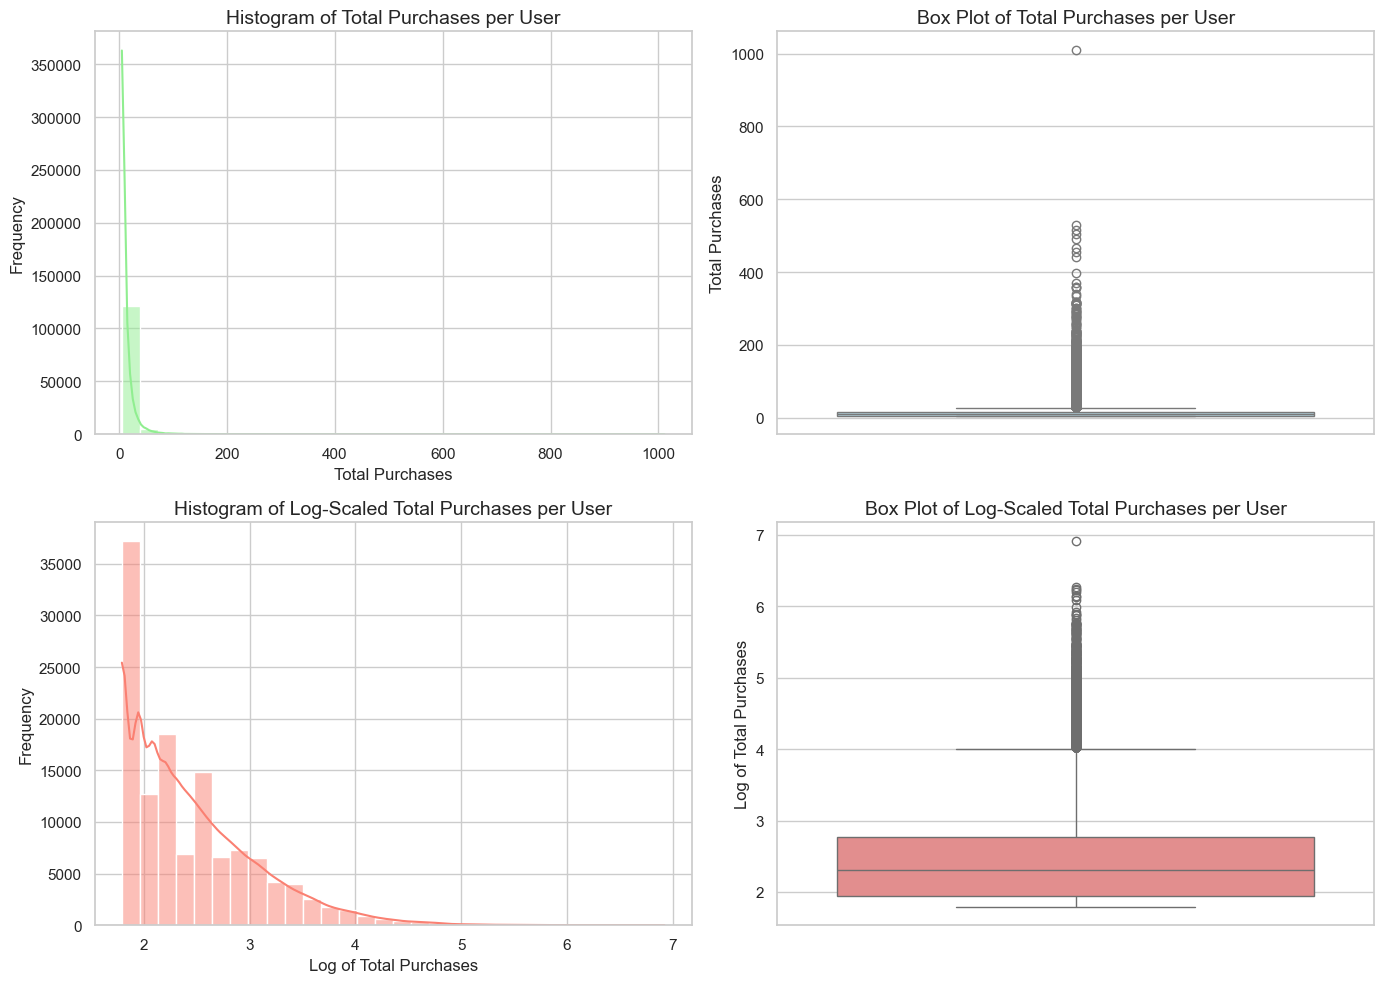

In [179]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

total_purchases_per_user = df.groupby('user_id')['usd'].count().reset_index(name='total_purchases')
total_purchases_per_user['log_total_purchases'] = np.log(total_purchases_per_user['total_purchases'] + 1)

# Histogram and Box Plot for Total Purchases
sns.histplot(total_purchases_per_user['total_purchases'], bins=30, kde=True, color='lightgreen', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Total Purchases per User', fontsize=14)
axes[0, 0].set_xlabel('Total Purchases', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

sns.boxplot(y=total_purchases_per_user['total_purchases'], color='lightblue', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Total Purchases per User', fontsize=14)
axes[0, 1].set_ylabel('Total Purchases', fontsize=12)

# Histogram and Box Plot for Log-Scaled Total Purchases
sns.histplot(total_purchases_per_user['log_total_purchases'], bins=30, kde=True, color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Log-Scaled Total Purchases per User', fontsize=14)
axes[1, 0].set_xlabel('Log of Total Purchases', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

sns.boxplot(y=total_purchases_per_user['log_total_purchases'], color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Log-Scaled Total Purchases per User', fontsize=14)
axes[1, 1].set_ylabel('Log of Total Purchases', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

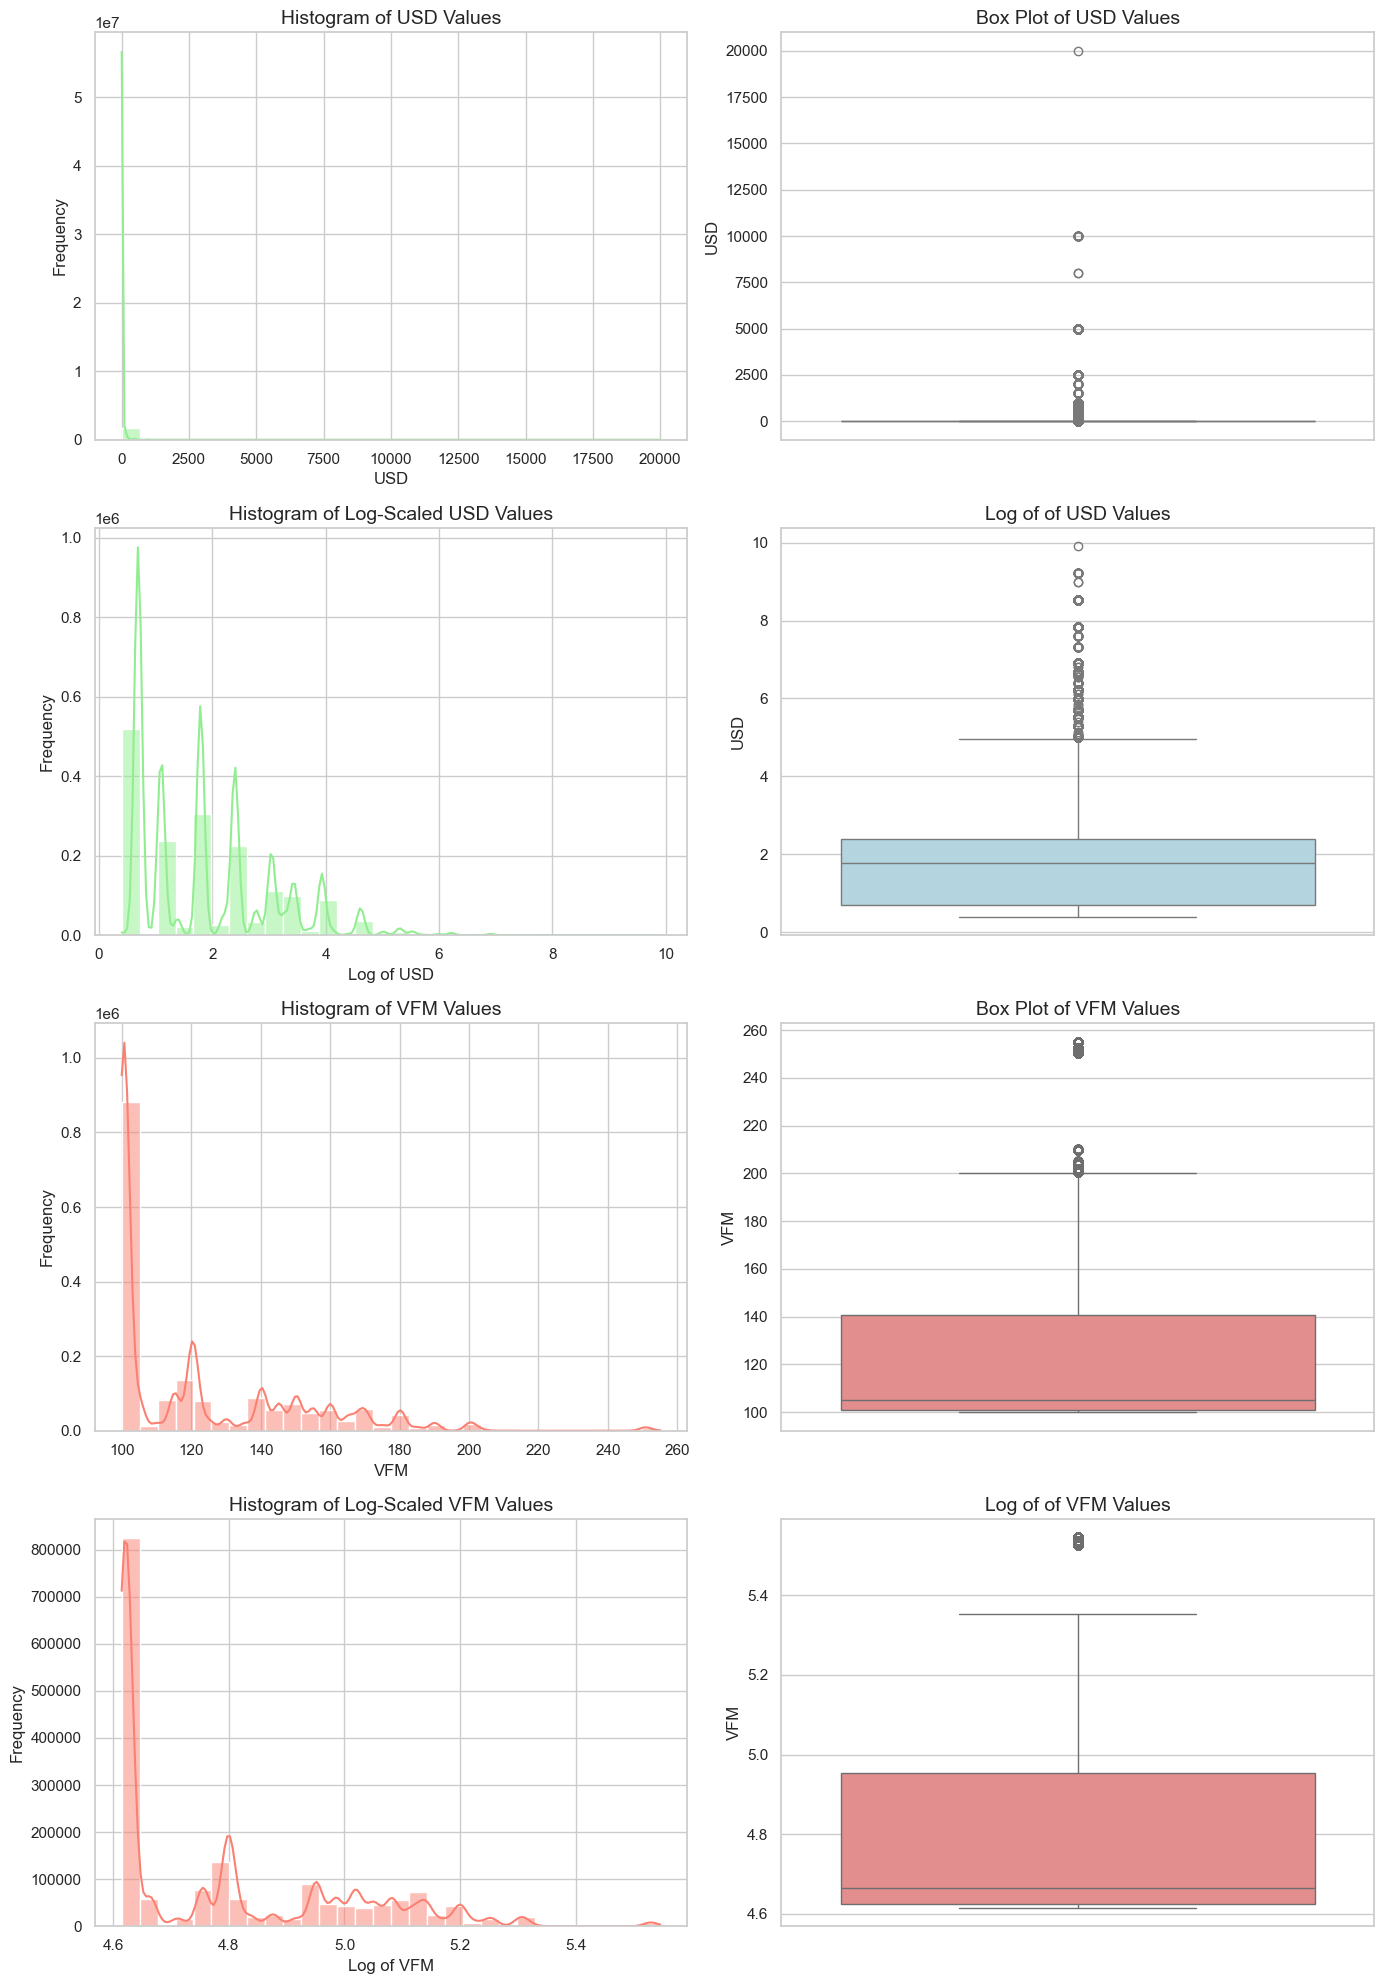

In [185]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 20))

df['usd_log'] = np.log(df['usd'] + 1)
df['VFM_log'] = np.log(df['VFM'] + 1)
# Histogram and Box Plot for USD
sns.histplot(df['usd'], bins=30, kde=True, color='lightgreen', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of USD Values', fontsize=14)
axes[0, 0].set_xlabel('USD', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

sns.boxplot(y=df['usd'], color='lightblue', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of USD Values', fontsize=14)
axes[0, 1].set_ylabel('USD', fontsize=12)

sns.histplot(df['usd_log'], bins=30, kde=True, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Log-Scaled USD Values', fontsize=14)
axes[1, 0].set_xlabel('Log of USD', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

sns.boxplot(y=df['usd_log'], color='lightblue', ax=axes[1, 1])
axes[1, 1].set_title('Log of of USD Values', fontsize=14)
axes[1, 1].set_ylabel('USD', fontsize=12)

# Histogram and Box Plot for VFM
sns.histplot(df['VFM'], bins=30, kde=True, color='salmon', ax=axes[2, 0])
axes[2, 0].set_title('Histogram of VFM Values', fontsize=14)
axes[2, 0].set_xlabel('VFM', fontsize=12)
axes[2, 0].set_ylabel('Frequency', fontsize=12)

sns.boxplot(y=df['VFM'], color='lightcoral', ax=axes[2, 1])
axes[2, 1].set_title('Box Plot of VFM Values', fontsize=14)
axes[2, 1].set_ylabel('VFM', fontsize=12)

sns.histplot(df['VFM_log'], bins=30, kde=True, color='salmon', ax=axes[3, 0])
axes[3, 0].set_title('Histogram of Log-Scaled VFM Values', fontsize=14)
axes[3, 0].set_xlabel('Log of VFM', fontsize=12)
axes[3, 0].set_ylabel('Frequency', fontsize=12)

sns.boxplot(y=df['VFM_log'], color='lightcoral', ax=axes[3, 1])
axes[3, 1].set_title('Log of of VFM Values', fontsize=14)
axes[3, 1].set_ylabel('VFM', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

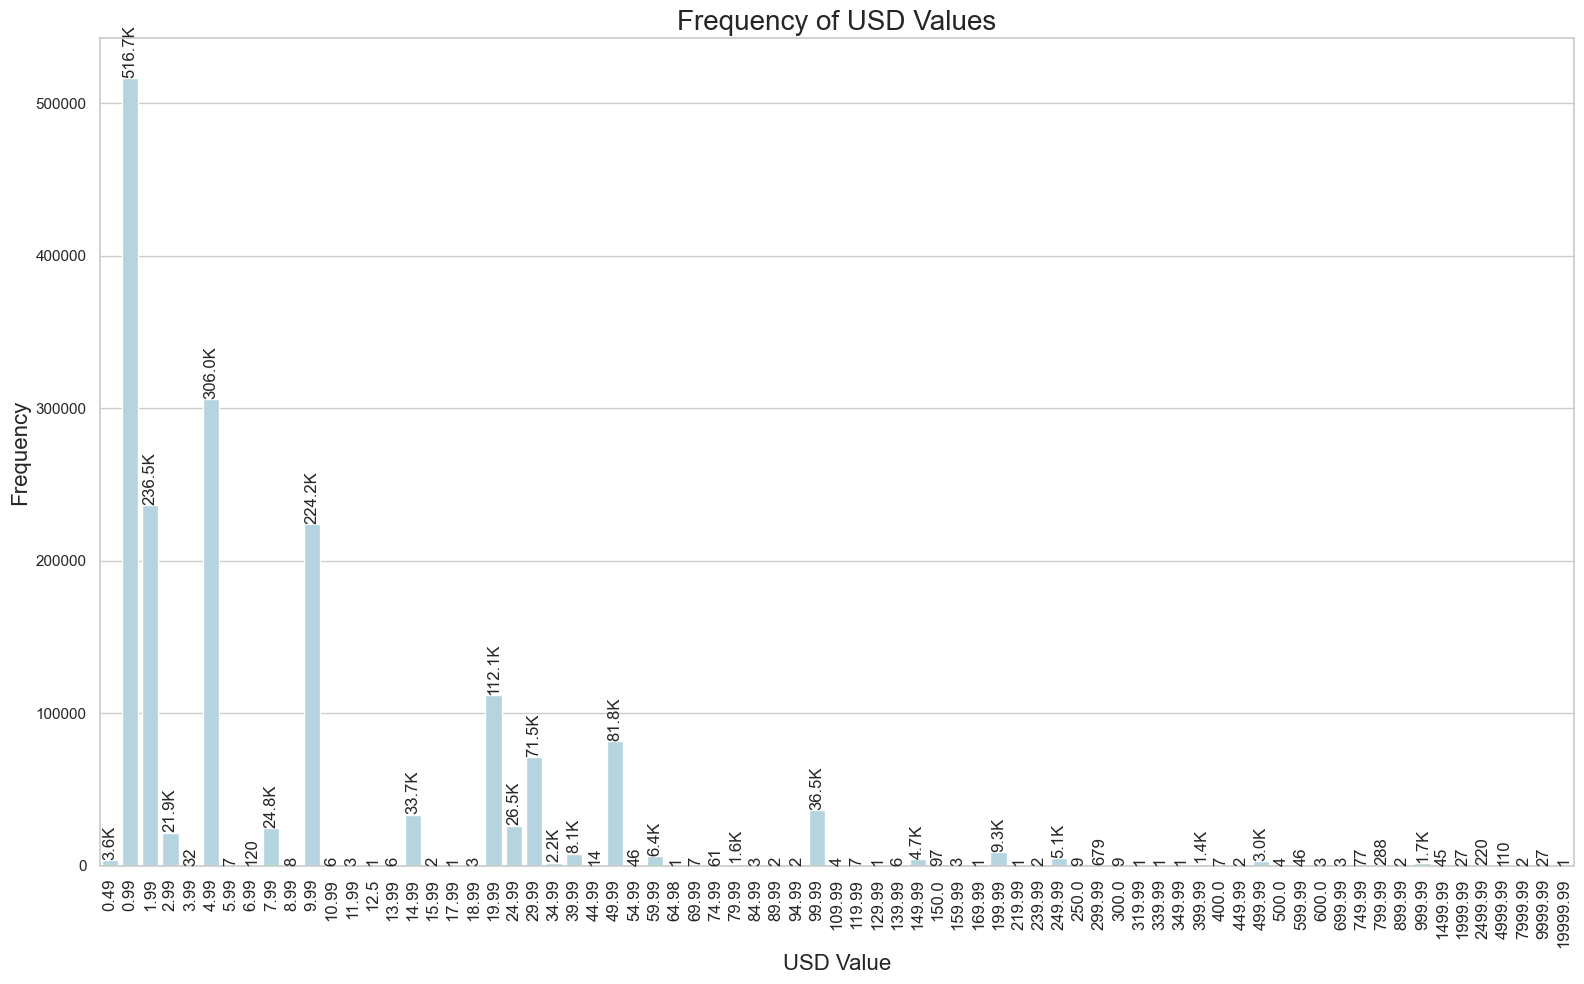

In [199]:
# Set the style for the plots
sns.set(style="whitegrid")

# Calculate value counts and sort
usd_counts = df.usd.value_counts().sort_index()

# Create a larger figure for the histogram
plt.figure(figsize=(16, 10))  # Increased size for better visibility

# Horizontal Histogram
bar_plot = sns.barplot(x=usd_counts.index, y=usd_counts.values, color='lightblue')
plt.title('Frequency of USD Values', fontsize=20)  # Increased title font size
plt.xlabel('USD Value', fontsize=16)  # Increased label font size
plt.ylabel('Frequency', fontsize=16)  # Increased label font size
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels to be vertical and increase font size

# Add value labels on top of each bar, displayed vertically and shortened
for p in bar_plot.patches:
    value = int(p.get_height())
    # Shorten the value
    if value >= 1_000_000:
        label = f'{value / 1_000_000:.1f}M'  # Millions
    elif value >= 1_000:
        label = f'{value / 1_000:.1f}K'  # Thousands
    else:
        label = str(value)  # No abbreviation

    # Adjust the vertical position of the label
    bar_plot.annotate(label, 
                      (p.get_x() + p.get_width() / 2., p.get_height() + 115),  # Add an offset of 5
                      ha='center', va='bottom', fontsize=12, rotation=90)  # Set rotation to 90 for vertical text

# Adjust layout
plt.tight_layout()
plt.show()

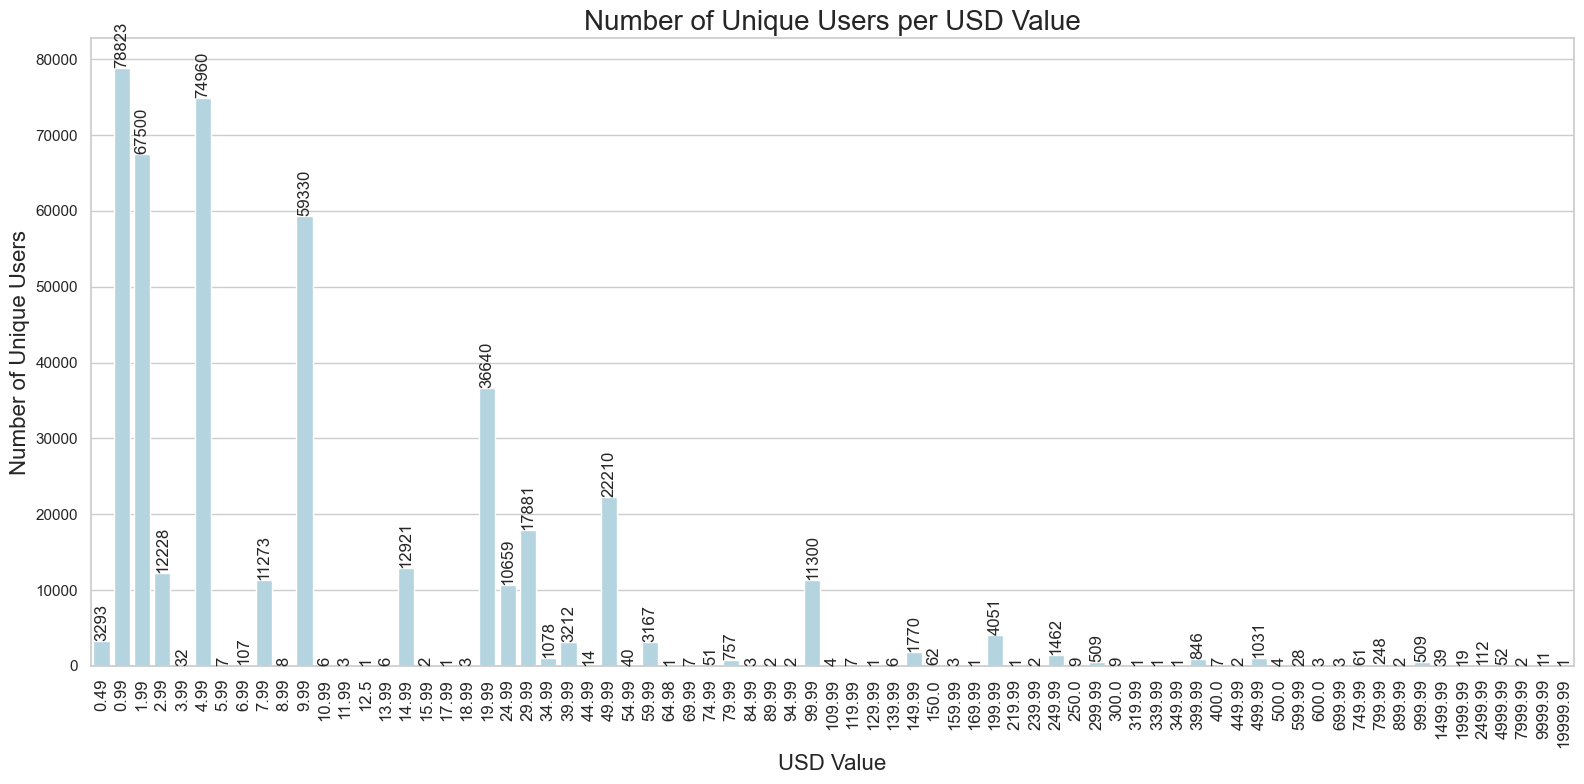

In [209]:
# Set the style for the plots
sns.set(style="whitegrid")

# Calculate the number of unique users for each USD value
unique_users_per_usd = df.groupby('usd')['user_id'].nunique().reset_index(name='unique_users')

# Create a figure for the plot
plt.figure(figsize=(16, 8))  # Adjust size as needed

# Bar plot for unique users per USD value
sns.barplot(x='usd', y='unique_users', data=unique_users_per_usd, color='lightblue')
plt.title('Number of Unique Users per USD Value', fontsize=20)
plt.xlabel('USD Value', fontsize=16)
plt.ylabel('Number of Unique Users', fontsize=16)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better readability

# Add value labels on top of each bar, displayed vertically
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, rotation=90)  # Set rotation to 90 for vertical text

# Adjust layout
plt.tight_layout()
plt.show()

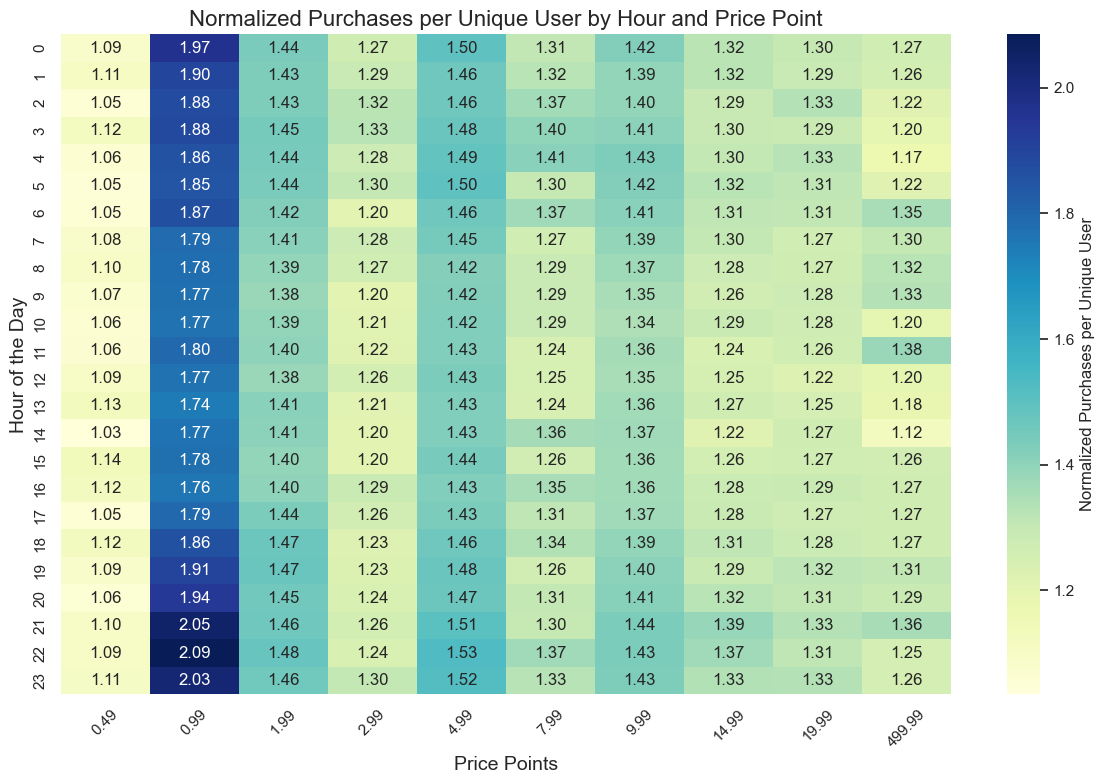

In [222]:
# Step 2: Calculate the number of purchases and unique users for each price point and hour
heatmap_data = df.groupby(['usd', 'hour']).agg(
    number_of_purchases=('user_id', 'count'),
    number_of_unique_users=('user_id', 'nunique')
).reset_index()

# Step 3: Calculate normalized values
heatmap_data['normalized_value'] = heatmap_data['number_of_purchases'] / heatmap_data['number_of_unique_users']

# Step 4: Get the top 10 price points
top_10_prices = heatmap_data['usd'].value_counts().nlargest(10).index

# Step 5: Filter the data for the top 10 price points
heatmap_data_top10 = heatmap_data[heatmap_data['usd'].isin(top_10_prices)]

# Step 6: Create a pivot table for the heatmap
# Step 6: Create a pivot table for the heatmap using pivot_table
heatmap_pivot = heatmap_data_top10.pivot_table(index='hour', columns='usd', values='normalized_value', aggfunc='mean')

# Step 7: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Normalized Purchases per Unique User'})
plt.title('Normalized Purchases per Unique User by Hour and Price Point', fontsize=16)
plt.xlabel('Price Points', fontsize=14)
plt.ylabel('Hour of the Day', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

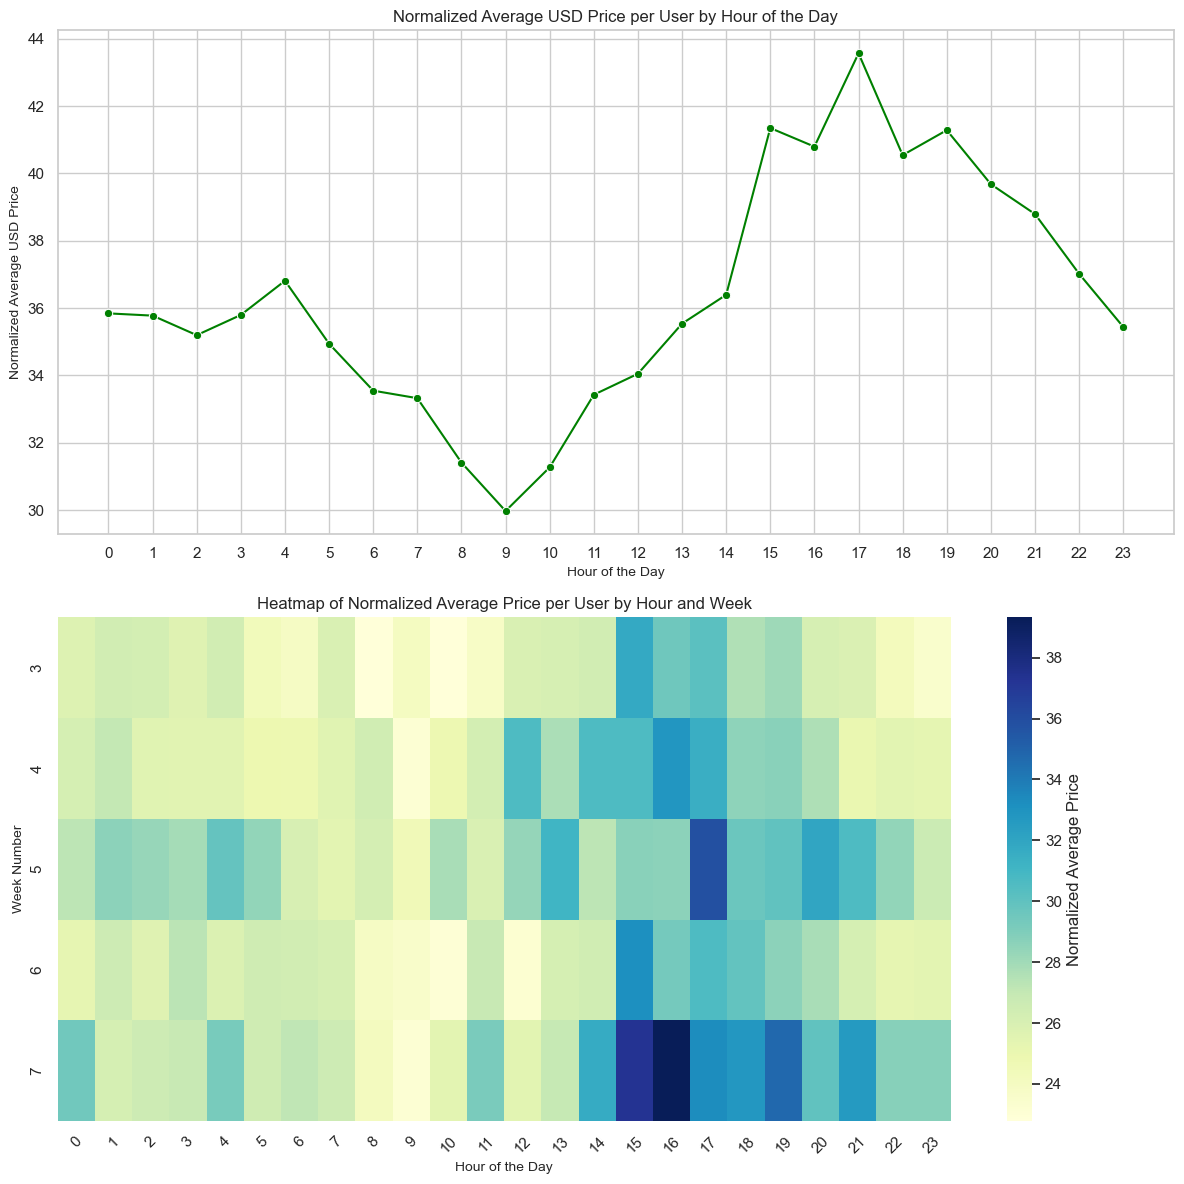

In [215]:

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Count unique users and calculate metrics per hour
user_count_by_hour = df.groupby('hour')['user_id'].nunique().reset_index(name='user_count')
total_price_by_hour = df.groupby('hour')['usd'].sum().reset_index(name='total_price')
merged_data = pd.merge(total_price_by_hour, user_count_by_hour, on='hour')
merged_data['normalized_avg_price'] = merged_data['total_price'] / merged_data['user_count']

# Plot line chart
sns.lineplot(data=merged_data, x='hour', y='normalized_avg_price', marker='o', color='green', ax=ax1)
ax1.set_title('Normalized Average USD Price per User by Hour of the Day', fontsize=12)
ax1.set_xlabel('Hour of the Day', fontsize=10)
ax1.set_ylabel('Normalized Average USD Price', fontsize=10)
ax1.set_xticks(range(24))
ax1.grid(True)

# Calculate metrics per hour and week
user_count_by_hour_week = df.groupby(['week', 'hour'])['user_id'].nunique().reset_index(name='user_count')
total_price_by_hour_week = df.groupby(['week', 'hour'])['usd'].sum().reset_index(name='total_price')
merged_week_data = pd.merge(total_price_by_hour_week, user_count_by_hour_week, on=['week', 'hour'])
merged_week_data['normalized_avg_price'] = merged_week_data['total_price'] / merged_week_data['user_count']

# Create heatmap data
heatmap_data = merged_week_data.pivot_table(index='week', columns='hour', values='normalized_avg_price', aggfunc='mean')

# Plot heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Normalized Average Price'}, ax=ax2)
ax2.set_title('Heatmap of Normalized Average Price per User by Hour and Week', fontsize=12)
ax2.set_xlabel('Hour of the Day', fontsize=10)
ax2.set_ylabel('Week Number', fontsize=10)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Sort the DataFrame by user_id and timestamp
df = df.sort_values(by=['user_id', 'timestamp'])
purchase_counts_df = df.groupby('user_id').apply(
    lambda x: x.set_index('timestamp').rolling('1min').count()  # '1min' is the frequency for 1 minute
)

# Reset the index to flatten the DataFrame
purchase_counts_df = purchase_counts_df.reset_index()

# Rename the columns for clarity
purchase_counts_df.columns = ['timestamp', 'user_id', 'purchase_count']


In [ ]:
purchase_counts_df.columns = ['timestamp', 'user_id', 'purchase_count']

In [214]:
# 1. User-Price interaction matrix
user_price_matrix = df.groupby(['user_id', 'usd'])['timestamp'].count().reset_index()
user_price_matrix.columns = ['user_id', 'price', 'count']

# 2. Price-VFM lookup
price_vfm = df.groupby('usd')['VFM'].mean().reset_index()
price_vfm.columns = ['price', 'vfm']

# 3. Price temporal features
price_temporal = df.groupby('usd').agg({
   'hour': 'mean',
   'week': 'mean'
}).reset_index()
price_temporal.columns = ['price', 'hour', 'week']

# Combine all features
final_df = user_price_matrix.merge(price_vfm, on='price').merge(price_temporal, on='price')

In [216]:
# 1. User-Price interaction matrix
user_price_matrix = df.groupby(['user_id', 'usd'])['timestamp'].count().reset_index()
user_price_matrix.columns = ['user_id', 'price', 'count']

# 2. Price-VFM lookup
price_vfm = df.groupby('usd')['VFM'].mean().reset_index()
price_vfm.columns = ['price', 'vfm']

# 3. Price temporal features
price_temporal = df.groupby('usd').agg({
   'hour': 'mean',
   'week': 'mean'
}).reset_index()
price_temporal.columns = ['price', 'hour', 'week']

# Combine all features
final_df = user_price_matrix.merge(price_vfm, on='price').merge(price_temporal, on='price')

In [217]:
final_df

,user_id,price,count,vfm,hour,week
0,38763,0.99,1,104.542824,12.791571,4.852215
1,38763,1.99,1,116.510349,12.844297,4.825854
2,38763,4.99,3,124.026255,12.718822,4.786744
3,102195,0.99,6,104.542824,12.791571,4.852215
4,102195,2.99,1,120.798680,13.031612,4.79473
...,...,...,...,...,...,...
438403,14294825903,0.49,1,176.241985,13.449973,4.849643
438404,14294825903,0.99,4,104.542824,12.791571,4.852215
438405,14294829183,0.99,3,104.542824,12.791571,4.852215
438406,14294829183,1.99,1,116.510349,12.844297,4.825854
